In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)

In [3]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix

In [4]:
data = pd.read_csv('AirlineTweets.csv')

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
df = data[['airline_sentiment','text']].copy()

In [7]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

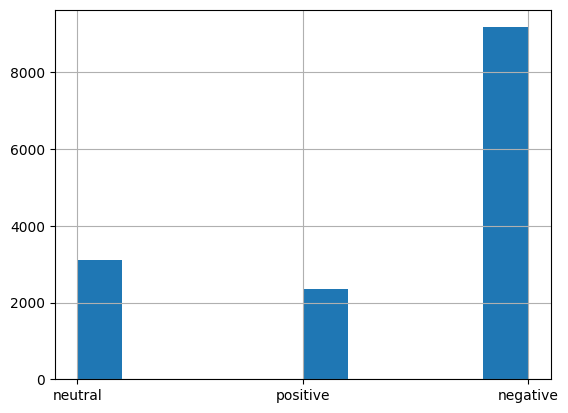

In [8]:
df['airline_sentiment'].hist()

In [9]:
target_map = {'positive':1,'negative':0,'neutral':2}
df['target'] = df['airline_sentiment'].map(target_map)

In [10]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [11]:
df_train,df_test = train_test_split(df)

In [12]:
df_train.head() 

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [13]:
vectorizer = TfidfVectorizer(max_features=2000)

In [14]:
X_train = vectorizer.fit_transform(df_train['text'])

In [15]:
X_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157852 stored elements in Compressed Sparse Row format>

In [16]:
X_test = vectorizer.fit_transform(df_test['text'])

In [17]:
Y_train = df_train['target']
Y_test = df_test['target']

In [18]:
#Classifier
model = LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

In [19]:
#Accuracy
print("Train accuracy: ",model.score(X_train,Y_train))
print("Test accuracy:",model.score(X_test,Y_test))

Train accuracy:  0.854735883424408
Test accuracy: 0.5598360655737705


In [20]:
Pr_train = model.predict_proba(X_train)#[:,1] for binary 
Pr_test = model.predict_proba(X_test)#[:,1] for binary
print("Train AUC: ",roc_auc_score(Y_train,Pr_train,multi_class='ovo'))
print("Test AUC: ",roc_auc_score(Y_test,Pr_test,multi_class='ovo'))

Train AUC:  0.9431009694266583
Test AUC:  0.5489227680533277


In [21]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [22]:
cm = confusion_matrix(Y_train,P_train,normalize='true')
cm

array([[0.96486133, 0.00813126, 0.02700741],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30193548, 0.0516129 , 0.64645161]])

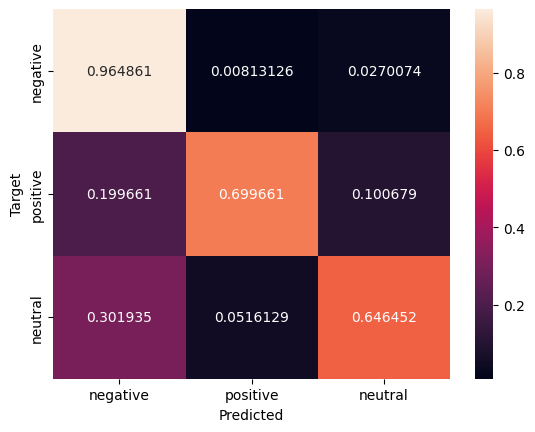

In [23]:
def plot_cm(cm):
    classes = ['negative','positive','neutral']
    df_cm = pd.DataFrame(cm,index=classes,columns=classes)
    ax = sn.heatmap(df_cm,annot=True,fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(cm)

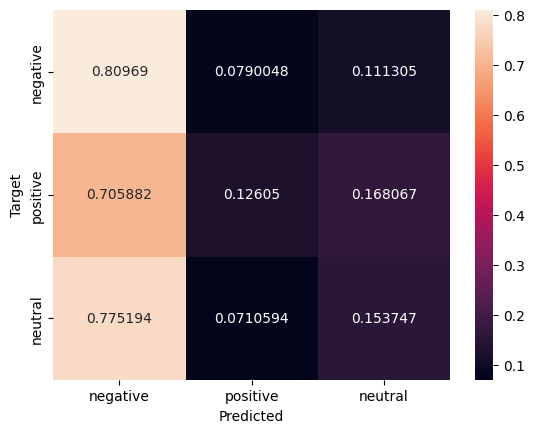

In [24]:
cm_test = confusion_matrix(Y_test,P_test,normalize='true')
plot_cm(cm_test)

In [25]:
#Binary Case
binary_target_list = [target_map['positive'],target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [26]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [27]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.fit_transform(df_b_test['text'])

In [28]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [29]:
model = LogisticRegression(max_iter=1500)
model.fit(X_train,Y_train)
print("Train score: ",model.score(X_train,Y_train))
print("Test score: ",model.score(X_test,Y_test))

Train score:  0.9300982091276718
Test score:  0.77997227997228


In [30]:
Pr_train = model.predict_proba(X_train)[:,1]
Pr_test = model.predict_proba(X_test)[:,1]
print("Train AUC: ",roc_auc_score(Y_train,Pr_train))
print("Test AUC: ",roc_auc_score(Y_test,Pr_test))

Train AUC:  0.9790315809115082
Test AUC:  0.4752660208561818


In [31]:
model.coef_

array([[-0.25739278, -0.13377981, -0.34118084, ...,  0.49951607,
         0.00725632, -0.61652739]])

(array([  2.,   0.,   2.,   3.,   2.,  12.,  25.,  60., 183., 776., 550.,
        227.,  86.,  44.,  11.,   2.,   2.,   4.,   2.,   1.,   3.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-4.23787117, -3.82467728, -3.41148339, -2.9982895 , -2.58509561,
        -2.17190172, -1.75870783, -1.34551394, -0.93232006, -0.51912617,
        -0.10593228,  0.30726161,  0.7204555 ,  1.13364939,  1.54684328,
         1.96003717,  2.37323105,  2.78642494,  3.19961883,  3.61281272,
         4.02600661,  4.4392005 ,  4.85239439,  5.26558827,  5.67878216,
         6.09197605,  6.50516994,  6.91836383,  7.33155772,  7.74475161,
         8.1579455 ]),
 <BarContainer object of 30 artists>)

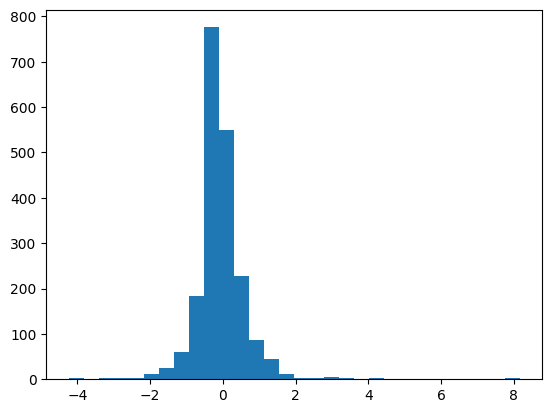

In [32]:
plt.hist(model.coef_[0],bins=30)

In [33]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'jetblue': 871,
 'll': 956,
 'pass': 1227,
 'along': 111,
 'the': 1679,
 'advice': 83,
 'you': 1986,
 'guys': 732,
 'rock': 1442,
 'united': 1814,
 'sent': 1509,
 'dm': 469,
 'with': 1936,
 'my': 1085,
 'file': 589,
 'reference': 1378,
 'number': 1144,
 'just': 882,
 'want': 1877,
 'to': 1718,
 'know': 896,
 'if': 817,
 'someone': 1578,
 'has': 755,
 'located': 961,
 'bag': 193,
 'even': 523,
 'it': 858,
 'not': 1131,
 'here': 778,
 'yet': 1984,
 'southwestair': 1588,
 'black': 223,
 'is': 852,
 'really': 1364,
 'sweet': 1640,
 'well': 1905,
 'done': 478,
 'why': 1924,
 'am': 118,
 'still': 1613,
 'in': 824,
 'delta': 435,
 'doing': 475,
 'around': 151,
 'us': 1835,
 'and': 126,
 'about': 63,
 'ridiculous': 1434,
 'sea': 1489,
 'den': 436,
 'south': 1586,
 'team': 1656,
 'on': 1169,
 'its': 862,
 'way': 1890,
 'http': 803,
 'co': 338,
 'one': 1172,
 'of': 1152,
 'your': 1988,
 'workers': 1949,
 'refused': 1382,
 'give': 700,
 'me': 1023,
 'her': 777,
 'name': 1088,
 'as': 157,
 'for':

In [34]:
#lets look at the weights for each word
threshold = 2

In [35]:
print("Most positive words.")
for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight>threshold:
        print(word,weight)

Most positive words.
delta 2.0881519343006816
auto 2.9299264512295378
loved 3.0216163022132876
ice 5.208733897079661
beyond 4.0547141043051
worst 2.120412437552246
anything 4.194647955673614
totally 8.070503978176507
sunny 2.860075665224218
wsj 2.7116513038663737
watched 3.228404796645749
bs 3.636864282502224
movement 4.405152711199247
male 2.61418363164063
hundreds 3.2615369143278583
touch 8.15794549577574
trips 2.8083250880360753


In [36]:
print("Most Negative Words.")
for word,index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight<-threshold:
        print(word,weight)

Most Negative Words.
ceo -2.221048457982377
early -2.70452709606316
ktn -2.0696846300406224
ya -3.1900355097162394
page -4.237871165070462
charlotte -2.6770621927891725
palm -2.076824480056312
win -2.014376186174848
wonder -2.2269879894552416
kudos -3.180120172866983
outstanding -3.9708361705169346
must -2.1625444978073203
karen -2.7902315406887612
